# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.116047e+01     6.653099e+00
 * time: 0.004375934600830078
     1     2.688663e+01     5.099880e+00
 * time: 0.012845993041992188
     2     2.245577e+01     8.956014e+00
 * time: 0.03389692306518555
     3     1.306881e+01     2.200955e+00
 * time: 0.062055110931396484
     4     1.230544e+01     2.897946e+00
 * time: 0.07904410362243652
     5     1.120814e+01     1.798488e+00
 * time: 0.09658193588256836
     6     9.831703e+00     2.095477e+00
 * time: 0.11368608474731445
     7     9.500036e+00     9.234164e-01
 * time: 0.13109707832336426
     8     9.238461e+00     1.304370e+00
 * time: 0.14444494247436523
     9     9.073336e+00     1.707834e+00
 * time: 0.15839910507202148
    10     8.961149e+00     1.628793e+00
 * time: 0.17198801040649414
    11     8.943226e+00     1.320325e+00
 * time: 0.18489408493041992
    12     8.752728e+00     6.761329e-01
 * time: 0.19830894470214844
    13     8.642206e+00     5.407671e-01
 * ti

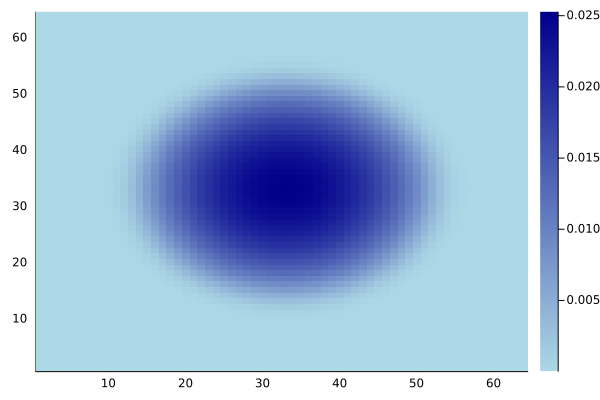

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)